<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_0701_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


4


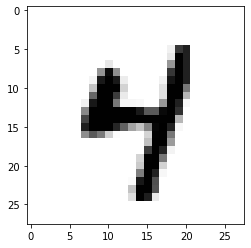

In [3]:
idx = 16459
print(y_train[idx])
plt.imshow(x_train[idx], cmap='Greys')

In [4]:
28*28

784

In [6]:
x_train = x_train / 255.
x_test = x_test / 255.

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
model = Sequential([Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2011 - accuracy: 0.9392
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0791 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0434 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0337 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0230 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0215 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0665 - accuracy: 0.9849


[0.06646093726158142, 0.9848999977111816]

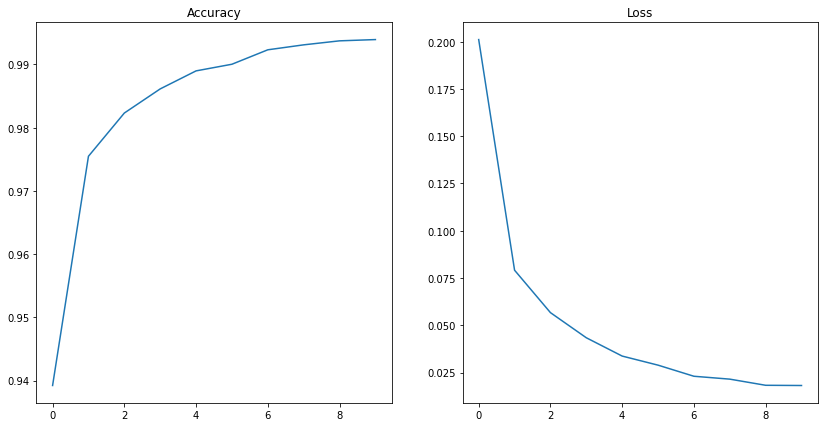

In [17]:
plt.figure(figsize=[14, 7])
ax = plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
ax = plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.show()

## Saving the model for future use

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [18]:
model.save('mnist-model.h5')

## Loading a save model

In [19]:
loaded_model = tf.keras.models.load_model('mnist-model.h5')

In [21]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [31]:
import numpy as np
np.testing.assert_allclose(
    model.predict(x_test), loaded_model.predict(x_test)
)
print("Si imprime esto, está todo bien")

Si imprime esto, está todo bien
